In [ ]:
import numpy as np

class Perceptron(object):
  def __init__(self, learning_rate=0.01, n_iters=10, random_state=1):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.random_state = random_state
    
  def fit(self, X, y):
    rand = np.random.RandomState(self.random_state)
    self.weights = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iters):
      errors = 0
      for x, target in zip(X, y):
        update = self.learning_rate * (target - self.predict(x))
        self.weights[1:] += update * x
        self.weights[0] += update
        errors += int(update != 0.0)
        self.errors_.append(errors)
      return self

  def net_input(self, X):
    summ = np.dot(X, self.weights[1:]) + self.weights[0]
    return summ

  def predict(self, X):
    return np.where(self.net_input(X) >= 0, 1, -1)

In [ ]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

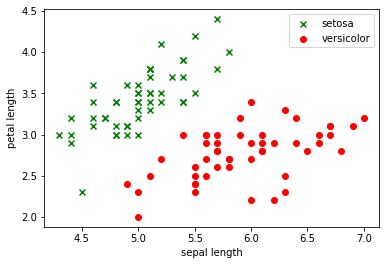

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')

plt.show()

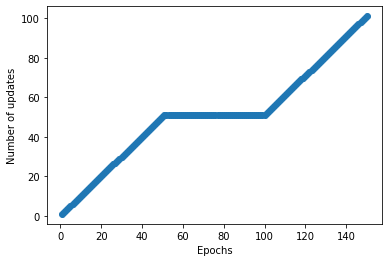

In [ ]:
per = Perceptron(learning_rate=0.1, n_iters=10, random_state=1)

per.fit(X, y)

plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()